A lot of people are protesting and marching together after George Floyd's murder by the police force. And some people are demanding reform and defunding of the police force. So, this is one of the country's growing concerns, and people are dividing in favor of him and against him. I am not either side of them, and I will work as a neutral person. I will classify the victim based on the race and bias between classes(White and Black) implementing machine learning algorithms based on the available data.

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import __version__ as mpv
import seaborn as sns
import sklearn
from sklearn import __version__ as sklv
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import log_loss, average_precision_score, make_scorer
sns.set()
%matplotlib inline

print('Using version %s of pandas' % pd.__version__)
print('Using version %s of matplotlib' % mpv)
print('Using version %s of seaborn' % sns.__version__)
print('Using version %s of sklearn' % sklv)
print('Using version %s of numpy' % np.__version__)


Using version 1.0.3 of pandas
Using version 3.1.3 of matplotlib
Using version 0.9.0 of seaborn
Using version 0.21.3 of sklearn
Using version 1.16.5 of numpy


In [121]:
# loading data source
df=pd.read_csv(r"C:\Users\pritam\Desktop\Police_killings.csv", engine="python")
df.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [122]:
# checking the shape of the data
df.shape

(5437, 14)

In [123]:
# checking the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5437 entries, 0 to 5436
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5437 non-null   int64  
 1   name                     5437 non-null   object 
 2   date                     5437 non-null   object 
 3   manner_of_death          5437 non-null   object 
 4   armed                    5210 non-null   object 
 5   age                      5199 non-null   float64
 6   gender                   5435 non-null   object 
 7   race                     4908 non-null   object 
 8   city                     5437 non-null   object 
 9   state                    5437 non-null   object 
 10  signs_of_mental_illness  5437 non-null   bool   
 11  threat_level             5437 non-null   object 
 12  flee                     5186 non-null   object 
 13  body_camera              5437 non-null   bool   
dtypes: bool(2), float64(1), 

In [124]:
# checking null values of the dataframe
df.isnull().any()

id                         False
name                       False
date                       False
manner_of_death            False
armed                       True
age                         True
gender                      True
race                        True
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                        True
body_camera                False
dtype: bool

In [125]:
# Yes,i found some null values and handled correctly
df.fillna(0,inplace=True)

In [68]:
df.head(40)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False
7,15,Brock Nichols,2015-01-06,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False
8,16,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True
9,17,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False


In [126]:
# checking null again
df.isnull().any().sum()

0

In [127]:
# now i have most of the datasets are in catagorial form so need to convert into numerical form.
# mostly i will be work on the manner_of death, armed and race data so lets convert it.
df['manner_of_death']=pd.factorize(df['manner_of_death'])[0]

In [128]:
df['manner_of_death'].value_counts()

0    5164
1     273
Name: manner_of_death, dtype: int64

In [129]:
# lets change the race of the person
#df['racewise_death']=pd.factorize(df['race'])[0]

In [130]:
#df['racewise_death'].value_counts()

In [131]:
# let's change the gender too
df['gender']=pd.factorize(df['gender'])[0]

In [132]:
df['gender'].value_counts()

0    5194
1     241
2       2
Name: gender, dtype: int64

In [133]:
# changing armed dato into numerical format
df['armed_']=pd.factorize(df['armed'])[0]

In [134]:
# converting mental illness into nunerical data
df['mental_illness']=pd.factorize(df['signs_of_mental_illness'])[0]

In [135]:
# changing threat_level into numerical format
df['threat_level']=pd.factorize(df['threat_level'])[0]

In [136]:
df1=df.drop(columns=['id','name','armed','city','state','signs_of_mental_illness','flee','body_camera'])

In [137]:
# created new dataframe to work on it.
# Final datasets 
df1.head(10)

,date,manner_of_death,age,gender,race,threat_level,armed_,mental_illness
0,2015-01-02,0,53.0,0,A,0,0,0
1,2015-01-02,0,47.0,0,W,0,0,1
2,2015-01-03,1,23.0,0,H,1,1,1
3,2015-01-04,0,32.0,0,W,0,2,0
4,2015-01-04,0,39.0,0,H,0,3,1
5,2015-01-04,0,18.0,0,W,0,0,1
6,2015-01-05,0,22.0,0,H,0,0,1
7,2015-01-06,0,35.0,0,W,0,0,1
8,2015-01-06,0,34.0,1,W,1,1,1
9,2015-01-06,0,47.0,0,B,0,2,1


In [138]:
# checking null values
df1.isnull().any().sum()

0

In [144]:
#(df1['race']==1).value_counts()

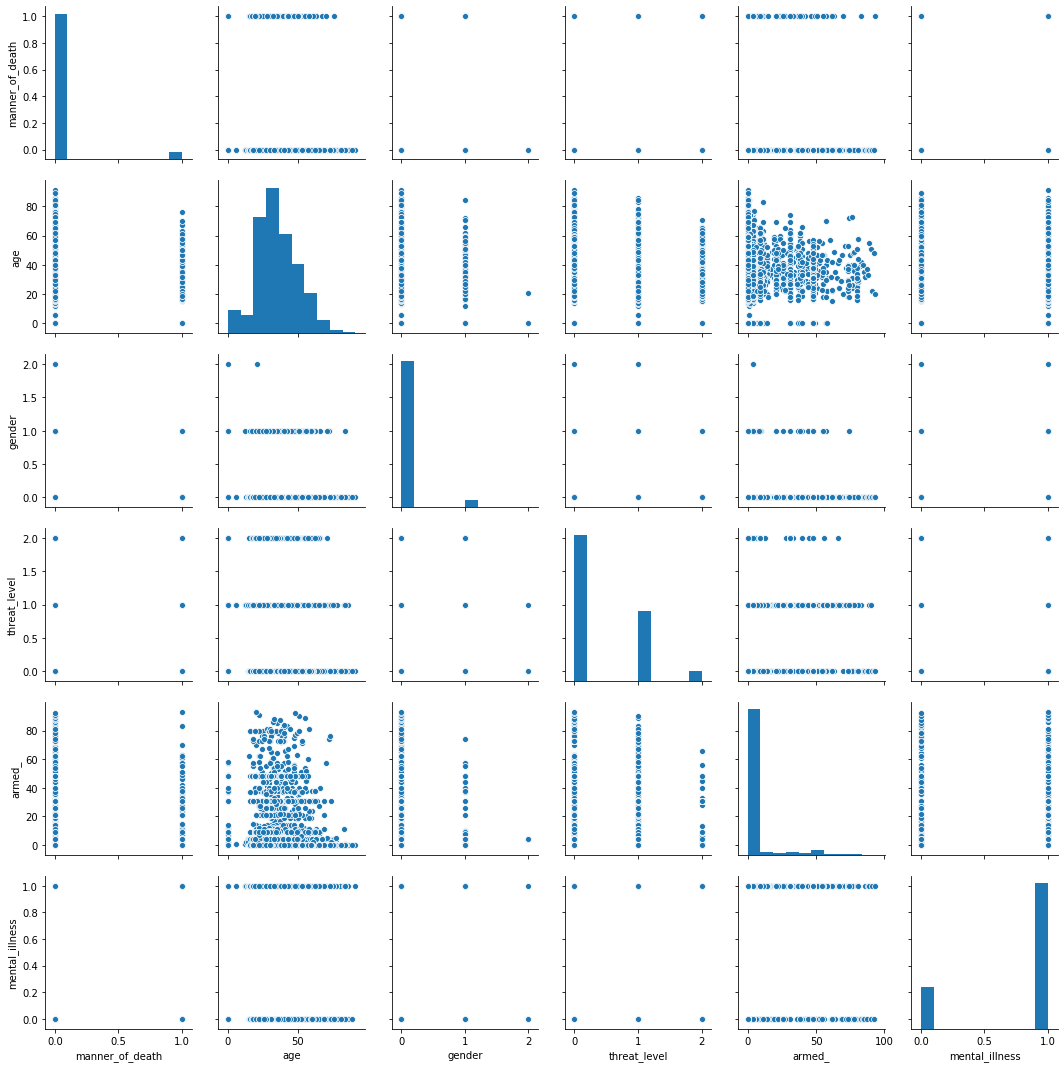

In [145]:
# pairplot to analyze the data structure
sns.pairplot(df1)

In [146]:
# From above plot, it concludes that it is classification problem and i have to use classification algorithms to handle it.

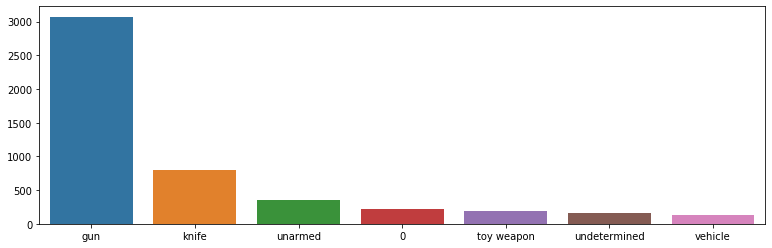

In [147]:
# i was kind of curious about the city,crime and other values so plotted.
# plotting killed data based on armed
armed=df.armed.value_counts()
plt.figure(figsize=(13,4))
sns.barplot(x=armed[:7].index,y=armed[:7].values)

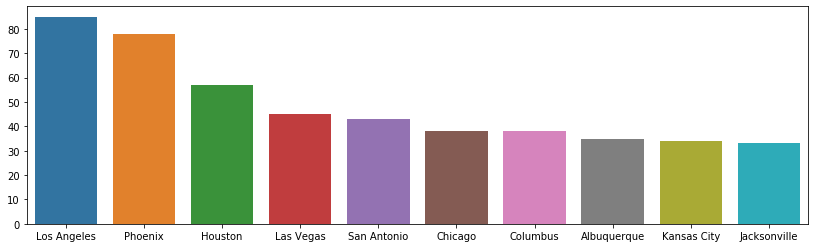

In [148]:
# top 10 most dangerous city
most_dangerous_city=df['city'].value_counts()
plt.figure(figsize=(14,4))
sns.barplot(x=most_dangerous_city[:10].index,y=most_dangerous_city[:10].values)
plt.show()

In [149]:
df1['date']

0       2015-01-02
1       2015-01-02
2       2015-01-03
3       2015-01-04
4       2015-01-04
           ...    
5432    2020-06-27
5433    2020-06-27
5434    2020-06-28
5435    2020-06-29
5436    2020-06-29
Name: date, Length: 5437, dtype: object

In [150]:
# changing into date format
df1['date']=pd.to_datetime(df1['date'])

In [151]:
# converting date as index
df1.set_index('date',inplace=True)

In [152]:
df1

,manner_of_death,age,gender,race,threat_level,armed_,mental_illness
date,,,,,,,
2015-01-02,0,53.0,0,A,0,0,0
2015-01-02,0,47.0,0,W,0,0,1
2015-01-03,1,23.0,0,H,1,1,1
2015-01-04,0,32.0,0,W,0,2,0
2015-01-04,0,39.0,0,H,0,3,1
...,...,...,...,...,...,...,...
2020-06-27,0,40.0,1,W,0,0,1
2020-06-27,1,58.0,0,B,0,31,1
2020-06-28,0,0.0,0,W,0,0,1


In [153]:
# filtering the data which shows black and white death
df2=df1[(df1['race']=='W') |(df1['race']=='B')]
df2

,manner_of_death,age,gender,race,threat_level,armed_,mental_illness
date,,,,,,,
2015-01-02,0,47.0,0,W,0,0,1
2015-01-04,0,32.0,0,W,0,2,0
2015-01-04,0,18.0,0,W,0,0,1
2015-01-06,0,35.0,0,W,0,0,1
2015-01-06,0,34.0,1,W,1,1,1
...,...,...,...,...,...,...,...
2020-06-27,0,33.0,0,W,1,4,1
2020-06-27,0,40.0,1,W,0,0,1
2020-06-27,1,58.0,0,B,0,31,1


In [154]:
# defining function for binary classification
def binary_target(val):
    if (val == 'W'):
        return 0
    else:
        return 1

In [158]:
# target variable
y=df2['race']
y

date
2015-01-02    W
2015-01-04    W
2015-01-04    W
2015-01-06    W
2015-01-06    W
             ..
2020-06-27    W
2020-06-27    W
2020-06-27    B
2020-06-28    W
2020-06-29    W
Name: race, Length: 3784, dtype: object

In [159]:
df2['race'].value_counts()

W    2485
B    1299
Name: race, dtype: int64

In [160]:
# placing mapped Y value in the dataframe
Y=y.map(binary_target)
df2['race']=Y

C:\Users\pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [163]:
Y.value_counts()

0    2485
1    1299
Name: race, dtype: int64

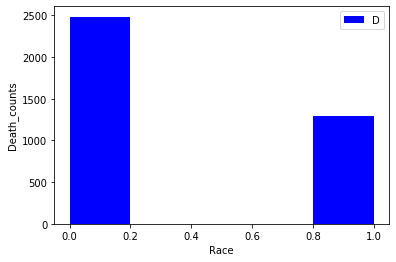

In [165]:
plt.hist(df2['race'],bins=5,color="blue")
plt.xlabel("Race")
plt.ylabel("Death_counts")

plt.legend("Death_counts")
plt.show()

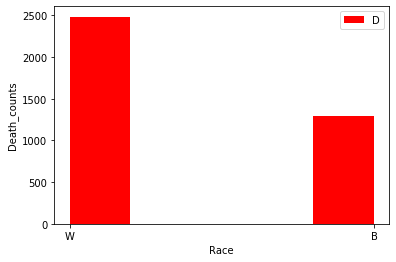

In [107]:
plt.hist(df2['race'],bins=5,color="red")
plt.xlabel("Race")
plt.ylabel("Death_counts")

plt.legend("Death_counts")
plt.show()

In [166]:
# creating data for input and target
feature_columns = ['manner_of_death','age','gender','armed_','mental_illness']
X=df2.drop(['race'],axis=1)
X


,manner_of_death,age,gender,threat_level,armed_,mental_illness
date,,,,,,
2015-01-02,0,47.0,0,0,0,1
2015-01-04,0,32.0,0,0,2,0
2015-01-04,0,18.0,0,0,0,1
2015-01-06,0,35.0,0,0,0,1
2015-01-06,0,34.0,1,1,1,1
...,...,...,...,...,...,...
2020-06-27,0,33.0,0,1,4,1
2020-06-27,0,40.0,1,0,0,1
2020-06-27,1,58.0,0,0,31,1


In [167]:
# Normalizing the input features
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X)
new_X=scaler.transform(X)

In [168]:
new_X

array([[0.        , 0.51648352, 0.        , 0.        , 0.        ,
        1.        ],
       [0.        , 0.35164835, 0.        , 0.        , 0.02150538,
        0.        ],
       [0.        , 0.1978022 , 0.        , 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.63736264, 0.        , 0.        , 0.33333333,
        1.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ],
       [0.        , 0.52747253, 0.        , 0.        , 0.        ,
        1.        ]])

In [169]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(new_X,Y,test_size=0.3,random_state=10)
# Yes we have split the data successfully

In [170]:
#create a pipeline
pipe=Pipeline([('classifier',RandomForestClassifier())])

In [171]:
# creating dictionary for hyperparameter tuning
grid_param=[
            {'classifier':[LogisticRegression()],
             'classifier__penalty':['l2','l1'],
             'classifier__C':np.logspace(0,4,10)
    
            },
            {'classifier':[RandomForestClassifier()],
             'classifier__n_estimators':[10,100,1000],
             'classifier__max_depth':[5,8,15,25,30,None],
             'classifier__min_samples_leaf':[1,2,5,10,15,100],
             'classifier__max_leaf_nodes':[2,5,10]
             
             
    
            }]

In [172]:
# creating gridsearch of the pipeline to fit the best model
gridsearch=GridSearchCV(pipe,grid_param,cv=5,verbose=0,n_jobs=-1)
best_model=gridsearch.fit(X_train,Y_train)

In [173]:
best_model.cv_results_

{'mean_fit_time': array([0.34297132, 0.00940857, 0.00620389, 0.01060734, 0.00500441,
        0.01020627, 0.0062048 , 0.00840483, 0.00560393, 0.01040716,
        0.00640416, 0.00940647, 0.00500288, 0.02061477, 0.0068047 ,
        0.01260896, 0.00760479, 0.0114069 , 0.00720468, 0.01300912,
        0.02901993, 0.21315217, 2.18465824, 0.02521825, 0.20534601,
        2.19786787, 0.02721839, 0.20434542, 2.19926848, 0.02281551,
        0.20434456, 2.19906845, 0.02181616, 0.22656121, 2.27188263,
        0.02341652, 0.26585517, 2.19486518, 0.02381711, 0.2211566 ,
        2.4691577 , 0.02881994, 0.25728631, 2.36132226, 0.02962122,
        0.26598902, 2.42909818, 0.02381697, 0.24637485, 2.37213025,
        0.02481728, 0.24440751, 2.39700994, 0.02661862, 0.23616776,
        2.30805264, 0.02701893, 0.25942664, 2.45335565, 0.02661839,
        0.34905014, 3.21198993, 0.03142242, 0.22476006, 2.70493498,
        0.07245121, 0.47193632, 2.67580657, 0.02962084, 0.22476029,
        3.04974737, 0.0228157 ,

In [175]:
# checking best score and best_params
best_model.best_score_,best_model.best_params_

(0.6858006042296072,
 {'classifier': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                         max_depth=15, max_features='auto', max_leaf_nodes=10,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=15, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=10,
                         n_jobs=None, oob_score=False, random_state=None,
                         verbose=0, warm_start=False),
  'classifier__max_depth': 15,
  'classifier__max_leaf_nodes': 10,
  'classifier__min_samples_leaf': 15,
  'classifier__n_estimators': 10})

In [176]:
# best_estimator
best_model.best_estimator_

Pipeline(memory=None,
         steps=[('classifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=15,
                                        max_features='auto', max_leaf_nodes=10,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=15,
                                        min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [177]:
# prediction
y_pred=best_model.predict_proba(X_test)[:,1]


In [199]:
# predicting race of the victim 
best_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [192]:
# checking classification of model
best_model.predict([[0,0.51,0,0,0,1]])

array([0], dtype=int64)

In [185]:
#model accuracy
best_model.score(X_test,Y_test)

0.710387323943662

In [178]:
# average precision_score
average_precision_score(Y_test, y_pred)

0.5142639343129612

In [179]:
log_loss(Y_test, y_pred)

0.5747115464343041

In [180]:
# Hence best parameters for this model are given.
grid_param1={'classifier':[RandomForestClassifier()],
             'classifier__n_estimators':1000,
             'classifier__max_depth':8,
             'classifier__min_samples_leaf':10,
             'classifier__max_leaf_nodes':10
             }

In [182]:
# checking accuracy of the model.
best_model.score(X_test,Y_test)

0.710387323943662

Finally, I have classified the death of the person based on the model. As a final result, I haven't got any parameter to conclude the bias, but I have seen police killed almost double whites, and I can say there is no known bias between white and Black. It is a very sensitive topic, so to find the actual results, we need to go deeper and need more data like poverty, population, arrest type, arrest_count, etc.


In [203]:
# Thanks!!!